## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', as_frame = False)

In [3]:
x, y = mnist['data'], mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
y = y.astype(int)

In [7]:
%matplotlib inline

In [8]:
import matplotlib
import matplotlib.pyplot as plt

In [9]:
some_digit = x[36008]
some_digit_image = some_digit.reshape(28, 28)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

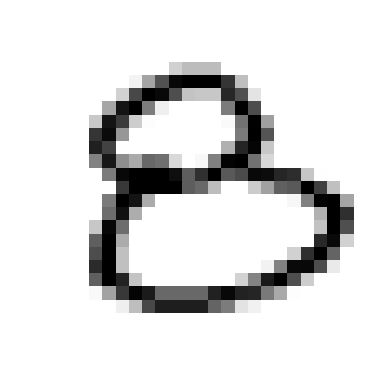

In [10]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.axis("off")

In [11]:
x_train, x_test = x[:60000], x[60000:]

In [12]:
y_train, y_test = y[:60000], y[60000:]

In [13]:
import numpy as np

shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]


## Creating a 2 detector

In [14]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [15]:
y_test_2

array([False,  True, False, ..., False, False, False], shape=(10000,))

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
clf = LogisticRegression(tol =0.1, solver='lbfgs')

In [18]:
clf.fit(x_train, y_train_2)

,penalty,'l2'
,dual,False
,tol,0.1
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [19]:
clf.predict([some_digit])

array([False])

In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x_train, y_train_2,cv=3,scoring = "accuracy")

In [21]:
scores

array([0.97865, 0.9796 , 0.978  ])

In [22]:
scores.mean()

np.float64(0.9787500000000001)

In [23]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv=3)



In [24]:
y_train_pred

array([False, False,  True, ..., False, False, False], shape=(60000,))

## Calculating Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_train_2, y_train_pred)

array([[53613,   429],
       [  846,  5112]])

In [27]:
confusion_matrix(y_train_2, y_train_2)
# Perfect prediction

array([[54042,     0],
       [    0,  5958]])

## Precision and Recall

In [28]:
from sklearn.metrics import precision_score, recall_score

In [29]:
precision_score(y_train_2, y_train_pred)

0.9225771521386031

In [30]:
recall_score(y_train_2, y_train_pred)

0.8580060422960725

## F1- Score

In [31]:
from sklearn.metrics import f1_score

In [32]:
f1_score(y_train_2, y_train_pred)

0.8891207931124445

## Precision Recall Curve

In [33]:
from sklearn.metrics import precision_recall_curve

In [34]:
y_scores = cross_val_predict(clf, x_train, y_train_2, cv=3, method="decision_function")

In [35]:
precisions, recall, thresholds = precision_recall_curve(y_train_2, y_scores)

In [36]:
precisions

array([0.0993    , 0.09930166, 0.09930331, ..., 1.        , 1.        ,
       1.        ], shape=(60001,))

In [37]:
recall


array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00], shape=(60001,))

In [38]:
thresholds

array([-35.7511493 , -35.67057725, -35.05723166, ...,  16.3296485 ,
        16.41386727,  16.85013037], shape=(60000,))

## Plot

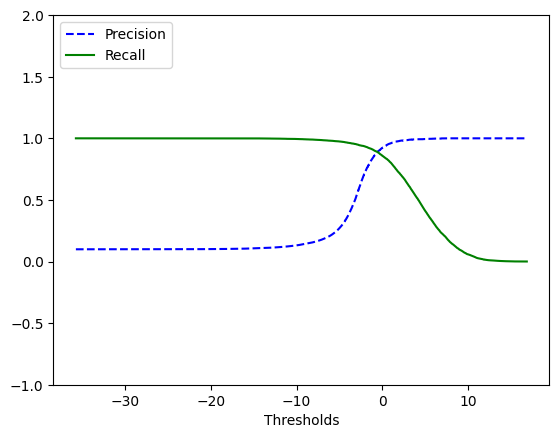

In [39]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([-1,2])
plt.show()